# Event Study of Bank of America Acquisition of Merrill Lynch

Event occurs on September 15, 2008

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('BOA_Event_Study.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,SPX_Close,BOA_Ret,SPX_Ret
0,23/7/2007,48.459999,48.599998,48.020000,48.150002,36.184750,24454400,1541.57,NaN,NaN
1,24/7/2007,47.930000,48.139999,47.000000,47.150002,35.433243,33103600,1511.04,-0.020987,-0.020003
2,25/7/2007,47.450001,48.240002,46.900002,47.930000,36.019413,33727500,1518.09,0.016408,0.004655
3,26/7/2007,47.340000,47.720001,46.900002,47.230000,35.493359,51484500,1482.66,-0.014712,-0.023615
4,27/7/2007,47.540001,48.209999,47.349998,47.410000,35.628643,37536200,1458.95,0.003804,-0.016121
...,...,...,...,...,...,...,...,...,...,...
313,16/10/2008,24.410000,25.020000,22.110001,24.250000,19.798573,132357000,946.43,0.017891,0.041629
314,17/10/2008,23.540001,24.780001,23.160000,23.240000,18.973969,113718000,940.55,-0.042542,-0.006232
315,20/10/2008,23.920000,24.450001,23.010000,24.400000,19.921041,84862900,985.40,0.048709,0.046583
316,21/10/2008,23.950001,24.920000,23.700001,23.969999,19.569971,75498200,955.05,-0.017780,-0.031284


Data collected do not contain weekend prices that are same as Friday closing. Returns are continuously compounded.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       318 non-null    object 
 1   Open       318 non-null    float64
 2   High       318 non-null    float64
 3   Low        318 non-null    float64
 4   Close      318 non-null    float64
 5   Adj Close  318 non-null    float64
 6   Volume     318 non-null    int64  
 7   SPX_Close  318 non-null    float64
 8   BOA_Ret    317 non-null    float64
 9   SPX_Ret    317 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 25.0+ KB


Selecting only rows from -250 days to -11 (inclusive) trading days from event date of 15 Sep 2008 for Estimation Period

In [4]:
df1=df.copy()
df2=df1.iloc[40:280,]
print(df2)

          Date       Open       High        Low      Close  Adj Close  \
40   18/9/2007  49.700001  51.299999  49.419998  51.209999  38.972641   
41   19/9/2007  51.450001  51.930000  50.680000  51.070000  38.866089   
42   20/9/2007  51.090000  51.400002  50.520000  50.790001  38.653019   
43   21/9/2007  51.279999  51.459999  50.650002  51.240002  38.995472   
44   24/9/2007  51.240002  51.250000  50.500000  50.590000  38.500790   
..         ...        ...        ...        ...        ...        ...   
275  22/8/2008  29.980000  30.430000  29.280001  30.209999  24.180759   
276  25/8/2008  29.940001  30.049999  28.850000  28.959999  23.180237   
277  26/8/2008  29.049999  29.490000  28.450001  29.020000  23.228256   
278  27/8/2008  29.170000  29.840000  28.790001  29.650000  23.732525   
279  28/8/2008  30.190001  31.430000  29.799999  31.430000  25.157278   

       Volume  SPX_Close   BOA_Ret   SPX_Ret  
40   33475200    1519.78  0.033761  0.028790  
41   34416800    1529.03 -0.0

# Using Market Model as Benchmark

In [5]:
import statsmodels.api as sm
x2 = df2['SPX_Ret']
y2 = df2['BOA_Ret']
x2 = sm.add_constant(x2)
model = sm.OLS(y2, x2).fit()

predictions = model.predict(x2)

results = model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BOA_Ret   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     262.9
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.48e-40
Time:                        15:40:35   Log-Likelihood:                 549.75
No. Observations:                 240   AIC:                            -1096.
Df Residuals:                     238   BIC:                            -1089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.002     -0.402      0.688      -0.004       0.002
SPX_Ret        1.9754      0.122     16.214      0.000       1.735       2.215
==============================================================================
Omnibus:                      137.371   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1302.778
Skew:                           2.072   Prob(JB):                    1.27e-283
Kurtosis:                      13.635   Cond. No.                         76.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
for attr in dir(model):
    if not attr.startswith('-'):
        print(attr)

HC0_se
HC1_se
HC2_se
HC3_se
_HCCM
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_abat_diagonal
_cache
_data_attr
_data_in_cache
_get_robustcov_results
_get_wald_nonlinear
_is_nested
_transform_predict_exog
_use_t
_wexog_singular_values
aic
bic
bse
centered_tss
compare_f_test
compare_lm_test
compare_lr_test
condition_number
conf_int
conf_int_el
cov_HC0
cov_HC1
cov_HC2
cov_HC3
cov_kwds
cov_params
cov_type
df_model
df_resid
diagn
eigenvals
el_test
ess
f_pvalue
f_test
fittedvalues
fvalue
get_influence
get_prediction
get_robustcov_results
info_criteria
initialize
k_constant
llf
load
model
mse_model
mse_resid
mse_total
nobs
normalized_cov_params
outlier_test
params
predict
pvalues
remove_data
resid
resid_pearson
rsquared
rsquared_adj
save
scale
ssr
summary
summar

In [7]:
df3 = df.iloc[280 : 301, ]
print(df3)

          Date       Open       High        Low      Close  Adj Close  \
280  29/8/2008  30.990000  31.480000  30.719999  31.139999  24.925148   
281   2/9/2008  32.730000  33.139999  32.060001  32.630001  26.117786   
282   3/9/2008  32.209999  32.990002  31.549999  32.959999  26.909729   
283   4/9/2008  32.580002  32.799999  30.500000  30.600000  24.982941   
284   5/9/2008  30.080000  32.290001  29.820000  32.230000  26.313734   
285   8/9/2008  35.259998  35.700001  33.450001  34.730000  28.354811   
286   9/9/2008  34.299999  35.099998  32.299999  32.520000  26.550508   
287  10/9/2008  32.970001  33.360001  31.200001  32.400002  26.452526   
288  11/9/2008  30.959999  33.230000  30.370001  33.060001  26.991375   
289  12/9/2008  32.279999  34.400002  32.099998  33.740002  27.546547   
290  15/9/2008  28.230000  30.110001  26.549999  26.549999  21.676373   
291  16/9/2008  25.030001  29.750000  25.000000  29.549999  24.125681   
292  17/9/2008  28.620001  29.400000  26.520000  27

In [8]:
x3 = df3['SPX_Ret']
y3 = df3['BOA_Ret']

c = model.params ### C[0] gives intercept estimate; C[1] gives slope estimate
### Compute Abnormal Return AR
ar = y3 - c.iloc[0] - c.iloc[1]*x3
ar

280    0.018667
281    0.055479
282    0.034534
283   -0.013644
284    0.043803
285    0.035238
286    0.003507
287   -0.015169
288   -0.006283
289    0.016812
290   -0.143635
291    0.073393
292    0.013146
293    0.033952
294    0.126135
295   -0.015390
296    0.006559
297   -0.002382
298    0.000743
299    0.059984
300   -0.010896
dtype: float64

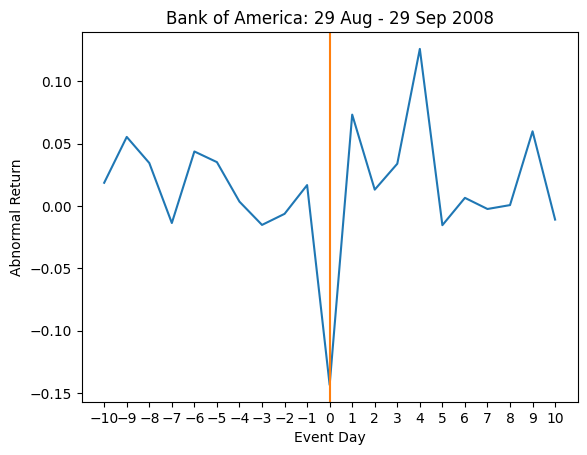

In [9]:
time = range(-10, 11, 1)

import matplotlib.pyplot as plt
plt.plot(time, ar)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])

plt.plot((0,0), (-1, 1), scaley = False)

plt.xlabel('Event Day')
plt.ylabel('Abnormal Return')
plt.title("Bank of America: 29 Aug - 29 Sep 2008")

plt.show()

In [11]:
car = ar.cumsum()
print(car)

280    0.018667
281    0.074146
282    0.108680
283    0.095036
284    0.138839
285    0.174077
286    0.177583
287    0.162414
288    0.156132
289    0.172944
290    0.029308
291    0.102701
292    0.115847
293    0.149799
294    0.275933
295    0.260544
296    0.267102
297    0.264721
298    0.265464
299    0.325448
300    0.314551
dtype: float64


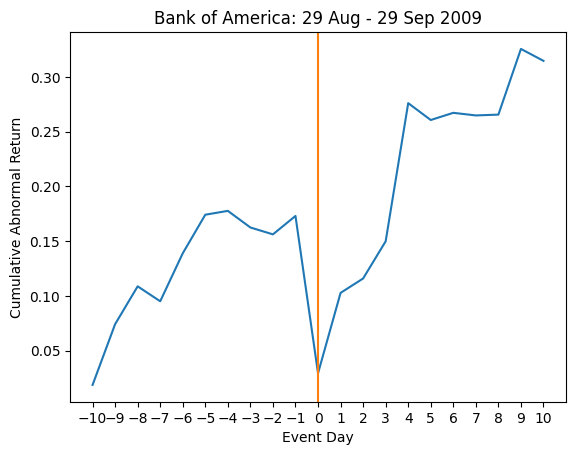

In [12]:
time = list(range(-10, 11, 1))

import matplotlib.pyplot as plt
plt.plot(time, car)
plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])
plt.plot((0,0), (-1,1), scaley = False)

plt.xlabel('Event Day')
plt.ylabel('Cumulative Abnormal Return')
plt.title('Bank of America: 29 Aug - 29 Sep 2009')

plt.show()

In [13]:
sigma = np.sqrt(model.mse_resid) # mean square error of the residual
sigma

0.024590619006816167

In [14]:
t_stat_ar = ar/sigma
t_stat_ar

280    0.759095
281    2.256108
282    1.404372
283   -0.554860
284    1.781300
285    1.432973
286    0.142605
287   -0.616865
288   -0.255491
289    0.683669
290   -5.841067
291    2.984578
292    0.534592
293    1.380694
294    5.129382
295   -0.625845
296    0.266722
297   -0.096858
298    0.030218
299    2.439308
300   -0.443114
dtype: float64

In [15]:
sd = np.sqrt(range(1,22,1)*(sigma**2))
sd

array([0.02459062, 0.03477639, 0.0425922 , 0.04918124, 0.0549863 ,
       0.06023447, 0.06506066, 0.06955277, 0.07377186, 0.07776237,
       0.08155786, 0.0851844 , 0.08866274, 0.09200967, 0.09523906,
       0.09836248, 0.10138972, 0.10432916, 0.10718802, 0.10997259,
       0.11268837])

In [16]:
t_stat_car = (car/sd)
t_stat_car

280    0.759095
281    2.132071
282    2.551643
283    1.932358
284    2.524975
285    2.889985
286    2.729506
287    2.335124
288    2.116412
289    2.224000
290    0.359353
291    1.205628
292    1.306599
293    1.628076
294    2.897272
295    2.648810
296    2.634413
297    2.537359
298    2.476617
299    2.959353
300    2.791338
dtype: float64

# Using Mean-Adjusted Return as Benchmark

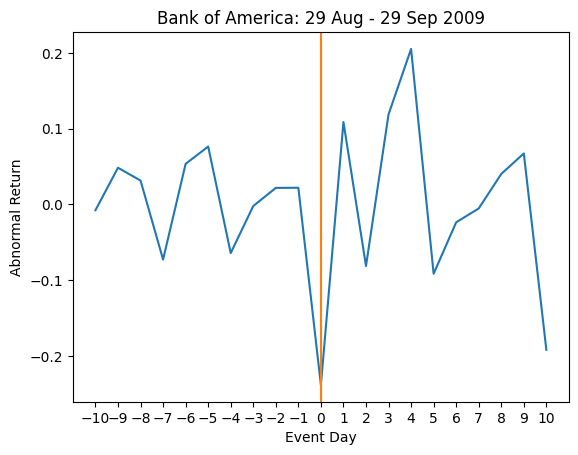

In [18]:
me_ar = y3 - np.mean(y2)
time = range(-10, 11, 1)

import matplotlib.pyplot as plt
plt.plot(time, me_ar)
plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])
plt.plot((0,0), (-1,1), scaley = False)

plt.xlabel('Event Day')
plt.ylabel('Abnormal Return')
plt.title('Bank of America: 29 Aug - 29 Sep 2009')

plt.show()

In [19]:
sd3 = np.std(y2 - np.mean(y2))
t_stat_me_ar = me_ar/sd3
t_stat_me_ar

280   -0.213563
281    1.363046
282    0.888229
283   -2.043946
284    1.508252
285    2.150274
286   -1.803361
287   -0.056695
288    0.615025
289    0.620488
290   -6.698666
291    3.060849
292   -2.285242
293    3.344450
294    5.774630
295   -2.571744
296   -0.662122
297   -0.147731
298    1.132745
299    1.893748
300   -5.393285
Name: BOA_Ret, dtype: float64

# Plotting Standardized Abnormal Returns of 3 Benchmarks

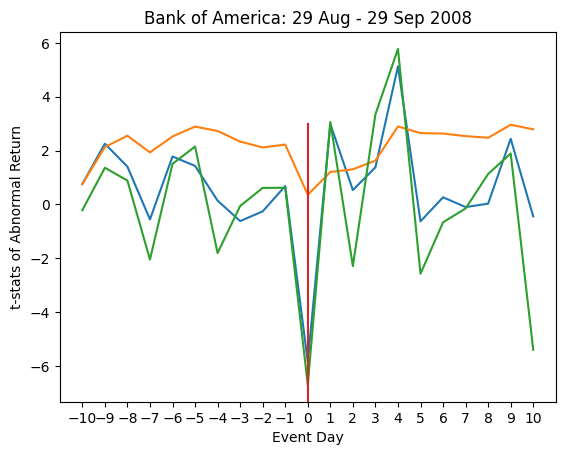

In [21]:
time = range(-10,11,1)  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 

plt.plot(time, t_stat_ar)
plt.plot(time, t_stat_car)
plt.plot(time, t_stat_me_ar)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])

plt.plot((0, 0), (-12, 3), scaley = False)

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('t-stats of Abnormal Return')
  
# giving a title to my graph
plt.title('Bank of America: 29 Aug - 29 Sep 2008')
  
# function to show the plot
plt.show()